# Vaccination Status Predictor

# Overview

Not only has there been significant debate surrounding vaccines, but, in the past few years, the debate seems to have heated up tremendously in a post-Covid world. Vaccination status has been a hot topic in  American discourse. As such, many have taken their own stand on vaccines and misinformation spread is significantly high surrounding this topic. 

The data used for this model was gathered while COVID-19 vaccines were still underway. A comparison can be made between the behavior surrounding the seasonal flu vaccination and COVID-19 vaccination based on the assumption that any individual's opinion on vaccination, as a whole, stands true. Additionaly, both diseases caused a major respiratory disease pandemic. 

Between 2009 and 2010, the United States conducted the National 2009 H1N1 Flu Survery. This was a phone survey which asked individuals about their seasonal flu vaccination status, as well as additional questions regarding the individuals. These supplementary questions ranged from social and economic background, to demographics, to opinions on risks of illness and vaccine effectiveness, and even behaviors to mitigate transmission. Understanding the relationship between these characteristics and vaccination status can shed light on actionable steps to make a difference, and impact the distribution of vaccinated vs. unvaccinated individuals. 

# Business Understanding

Robert Kennedy Jr., an outspoken attorney with significant family ties, is one of the more influential figures in our country spearheading the anti-vaccine movement. The charities he runs yield around half a million dollars a year. According to the group’s latest tax filings, 2020 was a lucrative year. He earned around three hundred and fifty thousand dollars as chairman of Children's Health Defense. This group claims that vaccines are contributing to a multitude of childhood illnesses. He has yet to pocket an additional 3 million (at least) from his best-selling book, "The Real Anthony Fauci: Bill Gates, Big Pharma and the Global War on Democracy and Public Health.” 

Recently, hedge fund manager Bernard Selz and his wife, Lisa, have donated more than 3 million dolalrs to anti-vax activitsts. 

Clearly, there is big money to be made here.

So, what do these groups do and how do they influence the behaviors of the masses? The World Mercury Project, headed by Kennedy, and a California-based organization called Stop Mandatory Vaccination bought 54 percent of the anti-vaccine ads on Facebook, according to a study conducted by researchers at George Washington University.
https://www.sciencedirect.com/science/article/pii/S0264410X1931446X?via%3Dihub

In recent years, these targeted social media campaigns have been able to sway some public opinion, and have led to increasing numbers of parents witholding vaccinations from their children, as well as individuals refusing to get COVID-19 vaccines. 

How does one monetize this social battleground? Like with any war, those in lofty positions make the most profit. If an individual demonstrates significant sway of public opinion, there is an increased likelihood of financial gain from a plethora of different sources. Said sources feel so strongly about vaccination status, that they are willing to dish out millions of dollars to those who are on the forefront, influencing the opinions of the masses. Centering oneself as an influential figure in the crux of a nationwide debate will yield monetary support in the form of donations, as well as securing leadership positions, which have proven to provide significant income streams. 

My goal is to provide actionable recommendations which could be deployed as tactics to influence the vaccination rates in this country. By doing so, one ascertains a tangible track record which shows the ability to change public opinion. Such power is expensive, and people will pay. 

## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, \
ExtraTreesClassifier, VotingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score, plot_roc_curve, roc_auc_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices, dmatrix, demo_data

%matplotlib inline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

# Data Understanding

The data for this competition comes from the National 2009 H1N1 Flu Survey (NHFS).

As they referenced:

The National 2009 H1N1 Flu Survey (NHFS) was sponsored by the National Center for Immunization and Respiratory Diseases (NCIRD) and conducted jointly by NCIRD and the National Center for Health Statistics (NCHS), Centers for Disease Control and Prevention (CDC). The NHFS was a list-assisted random-digit-dialing telephone survey of households, designed to monitor influenza immunization coverage in the 2009-10 season.

The target population for the NHFS was all persons 6 months or older living in the United States at the time of the interview. Data from the NHFS were used to produce timely estimates of vaccination coverage rates for both the monovalent pH1N1 and trivalent seasonal influenza vaccines.

(see nhfspuf_readme.txt)

The NHFS was conducted between October 2009 and June 2010. It was one-time survey designed specifically to monitor vaccination during the 2009-2010 flu season in response to the 2009 H1N1 pandemic. The CDC has other ongoing programs for annual phone surveys that continue to monitor seasonal flu vaccination.

This data is being used strictly for statistical reporting and analysis only.

## Reading in Data

In [2]:
training_set_labels = pd.read_csv('./data/training_set_labels.csv')

In [3]:
training_set_features = pd.read_csv('./data/training_set_features.csv')

# Data Exploration and Preparation

Joining the features and their correspondent labels into one dataframe

In [4]:
df1 = training_set_features.set_index('respondent_id')
df2 = training_set_labels.set_index('respondent_id')

# Joining the two dataframes no the same respondent_id index for better organization

flu_df = df1.join(df2)
pd.set_option('display.max_columns', None)

# This joined dataframe has many columns. The display.max_columns option prevents pandas from cutting out the middle 
# columns from our outputs.

In [5]:
flu_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [6]:
flu_df.describe()

# Looking at the descriptive statistics for the df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [7]:
flu_df.info()

# Checking data type of each column and looking for nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

## Target Label Distribution

In [8]:
flu_df.seasonal_vaccine.value_counts()

# Making sure there is no class imbalance in the target

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

## Data Cleaning and Feature Engineering

Since there are two targets in this dataset, I'm going to focus specifically on seasonal flu vaccination status. Consequently, I'll be dropping the target variable for H1N1 vaccination, as well as all columns associated with H1N1 questions. 

The 'health insurance' column has a lot of nulls. In my opinion, the number of nulls is so significant that one should avoid filling in the values or imputing them. There are simply not enough data points to create scientifically just values. In addition, I don't want to drop individual rows with null values associated with the 'health insurance' column, as too much data will be lost. Instead, I'm dropping the whole column. 

In [9]:
flu_df = flu_df.drop(['h1n1_vaccine', 'employment_industry', 'employment_occupation', 'hhs_geo_region', 'opinion_h1n1_sick_from_vacc','opinion_h1n1_risk','opinion_h1n1_vacc_effective','health_insurance', 'doctor_recc_h1n1', 'h1n1_knowledge', 'h1n1_concern'], axis=1)

In [10]:
flu_df.isnull().sum()

# After some feature engineering, we are still left with nulls to handle.

behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                    2042
employment_status              1463
census_msa                        0
household_adults                249
household_children              249
seasonal_vaccine                  0
dtype: int64

Let's create a function which returns the percentage of nulls in the entire dataset for any given column.

In [11]:
cols = list(flu_df.columns)

def null_percentage(df, cols):
    
    list_of_percentages = []
    
    for i in cols:
        
        percent = ((df[i].isna().sum())/(len(df))) * 100
    
        list_of_percentages.append(percent)
        
    zip_list = zip(cols, list_of_percentages)   

    return zip_list

# I would like to visualize the percentage specifically associated with each column

Let's drop the rows which contain the missing values

In [12]:
null_list = list(null_percentage(flu_df, cols))

for x in null_list:
    
    if x[1].astype(float) < 1:

        flu_df.dropna(axis=0,subset=[x[0]], inplace=True)   

In [13]:
list(null_percentage(flu_df, cols))

# sanity check

[('behavioral_antiviral_meds', 0.0),
 ('behavioral_avoidance', 0.0),
 ('behavioral_face_mask', 0.0),
 ('behavioral_wash_hands', 0.0),
 ('behavioral_large_gatherings', 0.0),
 ('behavioral_outside_home', 0.0),
 ('behavioral_touch_face', 0.0),
 ('doctor_recc_seasonal', 7.793561337141974),
 ('chronic_med_condition', 2.8642013433181504),
 ('child_under_6_months', 2.211842816335984),
 ('health_worker', 2.1809619393190767),
 ('opinion_seas_vacc_effective', 1.269976067320312),
 ('opinion_seas_risk', 1.4050799042692812),
 ('opinion_seas_sick_from_vacc', 1.4475411101675286),
 ('age_group', 0.0),
 ('education', 4.3464834401297),
 ('race', 0.0),
 ('sex', 0.0),
 ('income_poverty', 15.49834015286034),
 ('marital_status', 4.36964409789238),
 ('rent_or_own', 6.7088705319231074),
 ('employment_status', 4.558789469620937),
 ('census_msa', 0.0),
 ('household_adults', 0.0),
 ('household_children', 0.0),
 ('seasonal_vaccine', 0.0)]

In [14]:
flu_df.shape

# after dropping nulls that make up less than 1% of data, we went from 26707 to 25906 entries.

(25906, 26)

In [15]:
diff = 26707 - 25906

diff/26707 *100

# only dropped 3% of data

2.9992136892949417

In [16]:
flu_df.index.duplicated().sum()

# checking for duplicate entries

0

In [17]:
flu_df.duplicated().sum()

# This shows that some people have the same responses.
# Because index is respondent id, I know there are no duplicate respondents. 
# These are just different people who answered the survey exactly the same.

174

Let's plot a heatmap to investigate potential collinearity of variables.

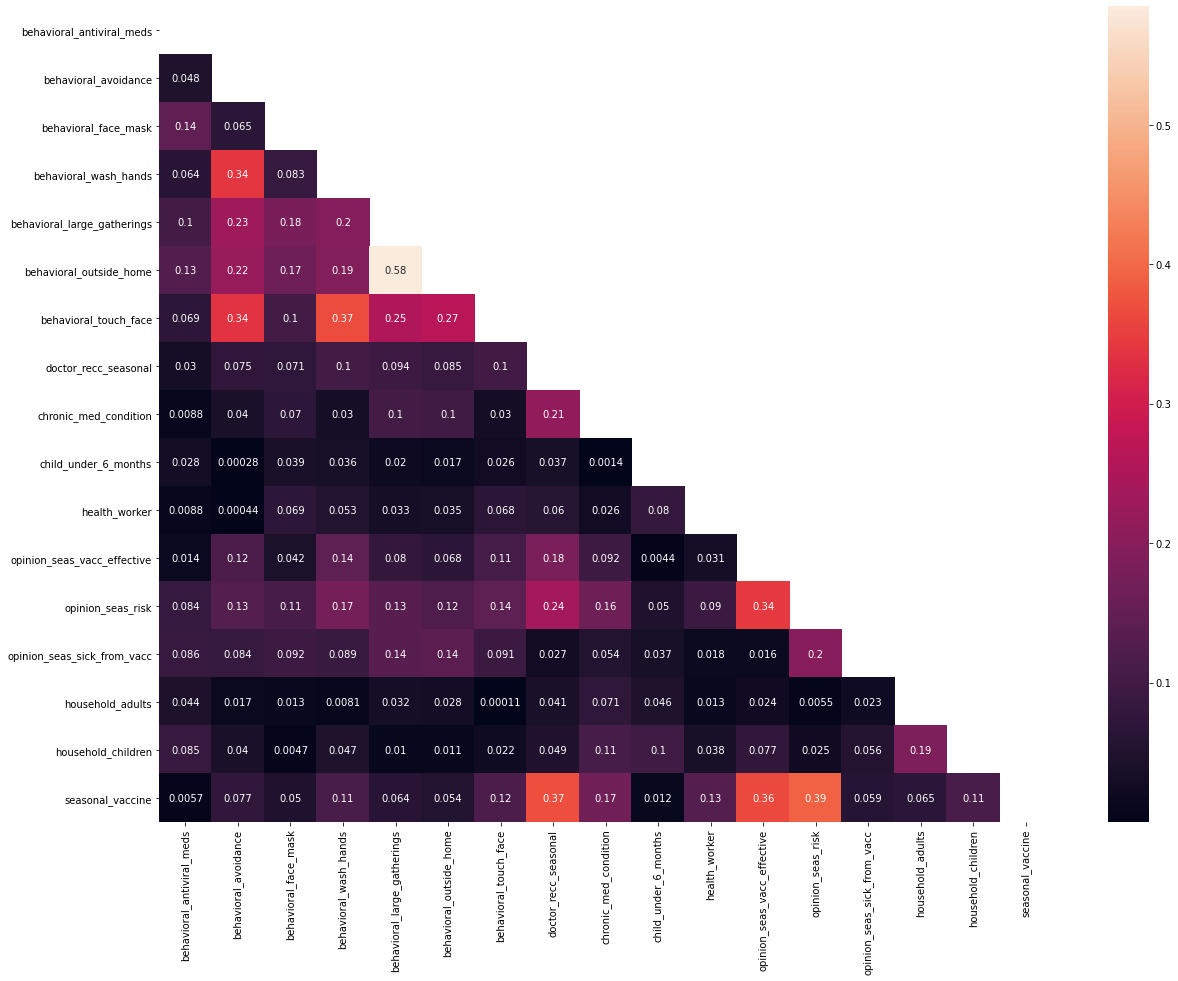

In [18]:
corr = abs(flu_df.corr())
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)), annot=True);

No significant collinearity. I will leave the columns as is. It's worth noting, however, that 'behavior_outside_home' has the highest Pearson correlation value with 'behavioral_large_gatherings'. This number is not significant enough to imply collinearity. 

## Plotting Target Distributions

Let's create a function which plots the vaccination rates

In [22]:
def vaccination_rate_plot(col, target, data, ax=None):

    counts = (flu_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target))
    
    # organizing the data to better visualize the rates based on survey responses
    
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

<ipython-input-23-d9b3b5cc07ac>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(7,4))


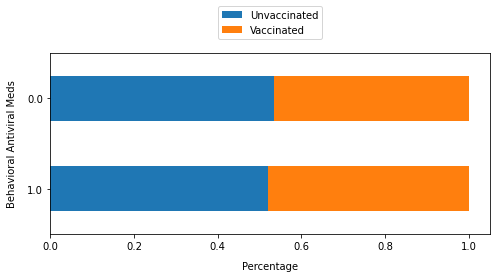

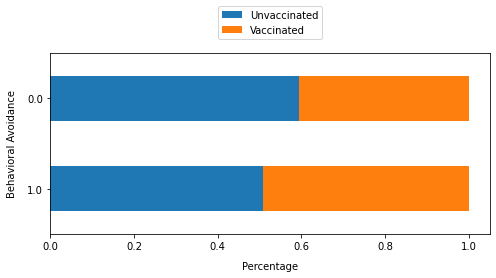

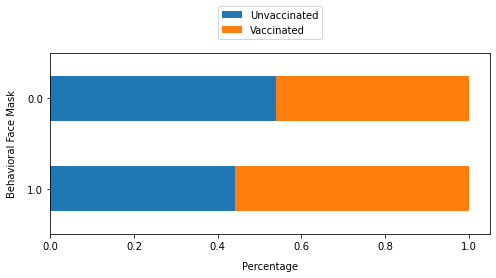

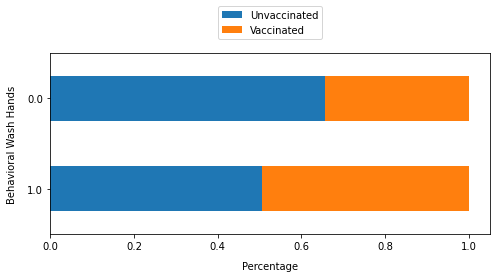

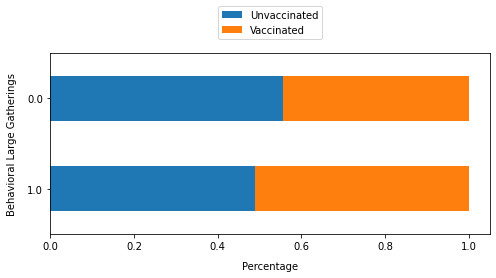

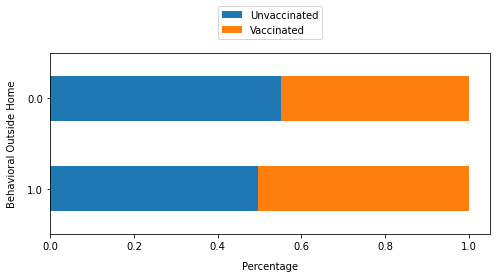

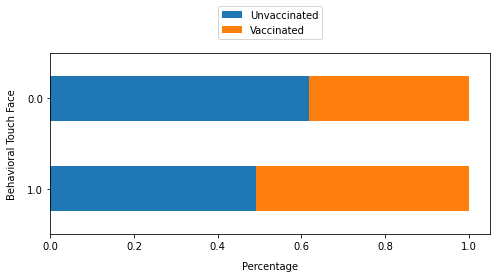

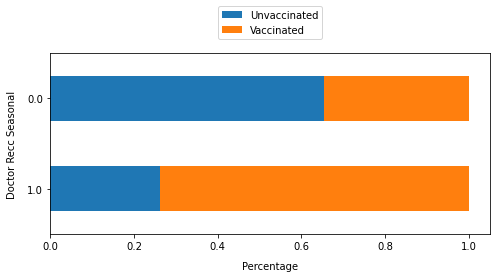

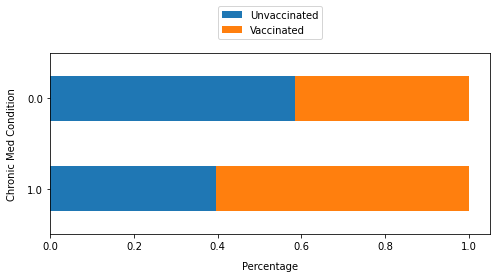

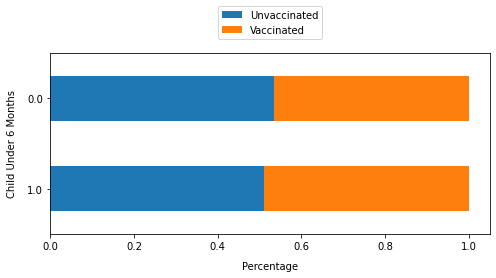

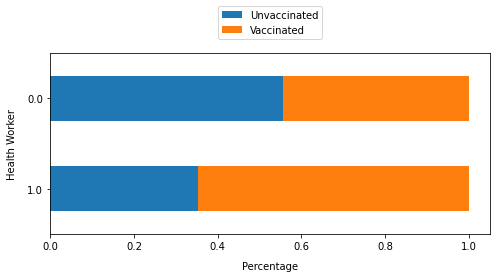

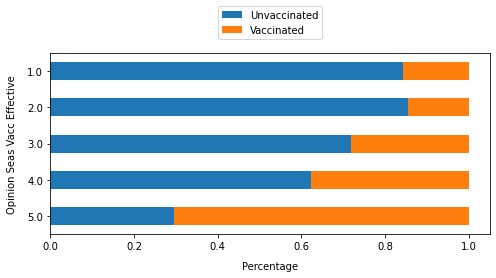

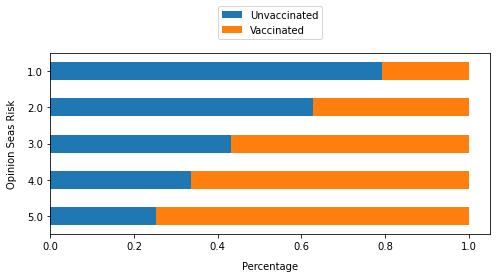

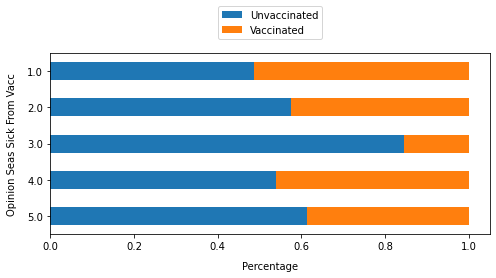

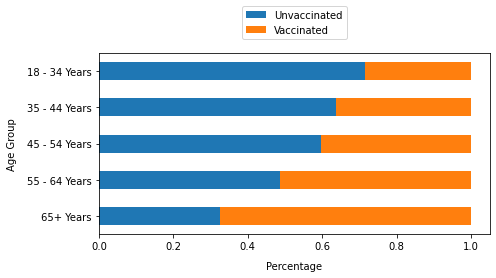

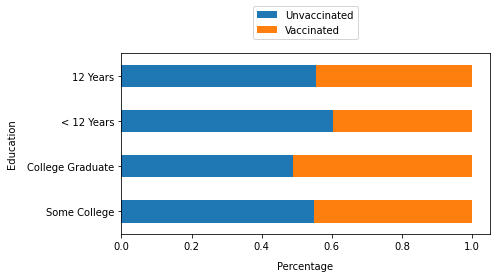

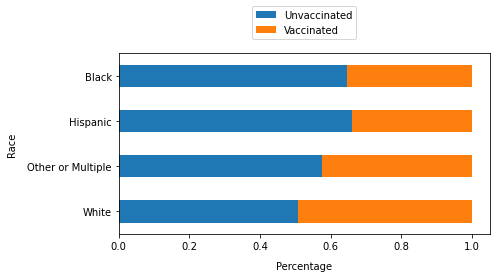

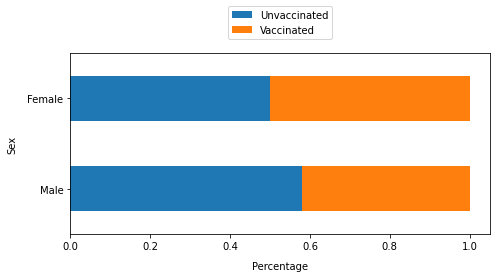

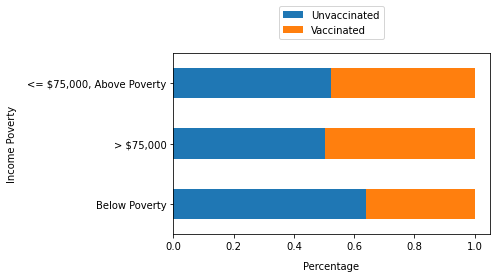

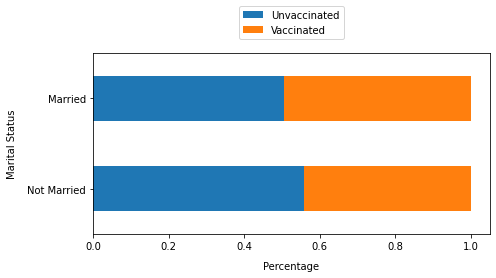

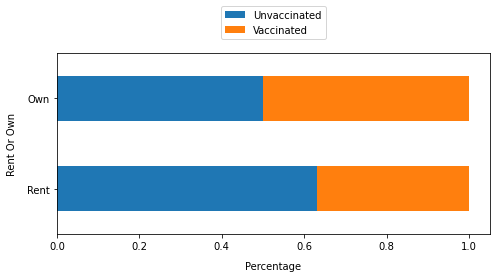

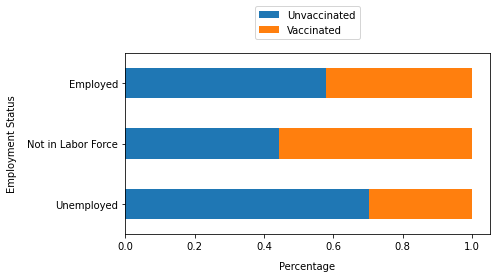

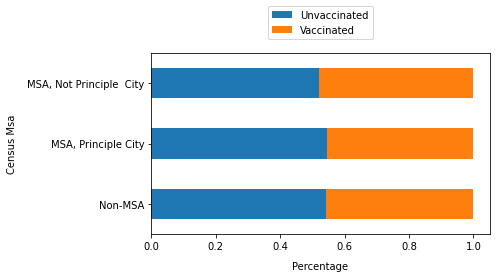

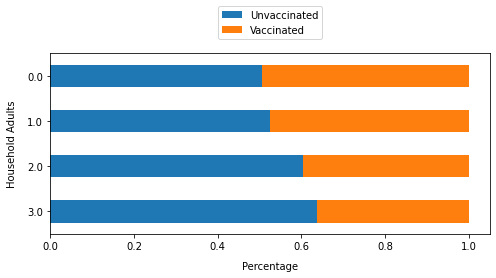

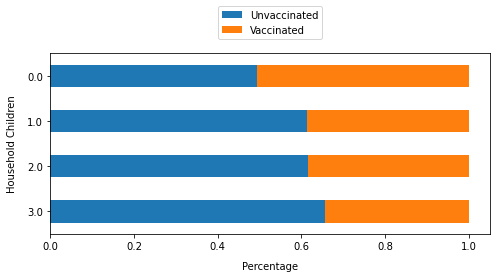

In [23]:
new_cols = flu_df.drop('seasonal_vaccine', axis=1).columns

# dropping target for purposes of plotting. This is not being reflected in flu_df. 

for idx, col in enumerate(new_cols):
    
    fig, ax = plt.subplots(figsize=(7,4))
    
    vaccination_rate_plot(col, 'seasonal_vaccine', flu_df, ax=ax)
    ax.set_ylabel(col.replace('_', ' ').title(),  labelpad=10)
    ax.set_xlabel('Percentage', labelpad=10)
    ax.legend(['Unvaccinated', 'Vaccinated'],loc=8, bbox_to_anchor=(0.5, 1.05),)
    
    fig.tight_layout()
    
    plt.savefig(f'Images/rates_bar{idx}.png', bbox_inches='tight')

In [24]:
flu_df = flu_df.drop(['census_msa', 'marital_status', 'child_under_6_months', 'behavioral_antiviral_meds'], axis=1)

# dropping columns where distribution is the same regardless of answer given by respondent, as they don't impact target.

# Modeling

## Modeling Class

Let's create a class which allows us to model with cross validation.

Based on the business problem, I will be primarily focusing on accuracy score as my metric to assess the quality of each model. Since false classification will not result in any ethical concerns, I am only concerned with the accuracy of the model in how it predicts class. Unlike other medical business problems, the implication of a false negative is not as detrimental as, say, a diagnostic tool. On the flip side, it will not be too costly if there is a false positive. In a diagnostic medical context, a false positive would mean an individual has to undergo further testing and potentially unnecessary treatment, which will not only reflect poorly on the company running the test, but also end up being more costly. For this reason, recall, precision, F1 are not important for this business problem.

In [29]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)
    

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax)

        return ax

#taken from David Elliots lecture on classification workflow

## Train-Test Split

Performing a train-test split to prevent data leakage. Crucial to keep the testing data completely separate, so that it can truly predict on unseen data.

In [30]:
X = flu_df.drop(['seasonal_vaccine'], axis=1)
y = flu_df['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## FunctionTransformer and ColumnTransformer Piplelines

Creating pipelines which we will use to encode and impute the dataframe. We will be imputing both missing numerical and categorical values. Additionally, we will scale numerical values and one hot encode categorical values. We are able to access numerical vs categorical data with the 'grab' functions belows. The function transformer allows us to include the functions in the pipelines. A pipeline is created for numerical and categorical values. These two pipelines are then included in the column transformer pipeline to prevent data leakeage. We will be using X_train data, but this will also account for the changes which need to be made to testing data.

In [31]:
def grab_numeric(df):
    return df.select_dtypes(include=['float', 'int'])

def grab_object(df):
    return df.select_dtypes(include=['object'])

GrabNumeric = FunctionTransformer(grab_numeric)
GrabObject = FunctionTransformer(grab_object)

subpipe_num = Pipeline(steps=[('get_num', GrabNumeric),
                              ('num_impute', SimpleImputer()),
                              ('ss', StandardScaler())])


subpipe_cat = Pipeline(steps=[('get_cat', GrabObject),
                              ('cat_impute', SimpleImputer(strategy='most_frequent')),
                              ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

ct = ColumnTransformer(transformers = [
    ('subpipe_num', subpipe_num, X_train.columns),
    ('subpipe_cat', subpipe_cat, X_train.columns),])

## Baseline Model

Setting up a baseline model as the absolute minimum model to beat and compare the rest of the models to. I'm creating a pipeline for the dummy classifier so that I can correspond any given chagnes I make to my estimators back to my dummy. 

In [35]:
dummy_pipe = Pipeline(steps=[
    ('ct', ct),
    ('dummy', DummyClassifier(strategy='most_frequent'))])

dummy_pipe.fit(X_train, y_train)

dummy_model_pipe = ModelWithCV(
    model=dummy_pipe,
    model_name='dummy_model_pipe',
    X=X_train,
    y=y_train)

# creating pipeline, fitting the training data, and running ModelWithCV class from above

Looks like 0.53261 is the accuracy score to beat. This is the mean of the 5 accuracy scores of CV for this model.

CV Results for `dummy_model_pipe` model:
            0.53261 ± 0.00016 accuracy
        


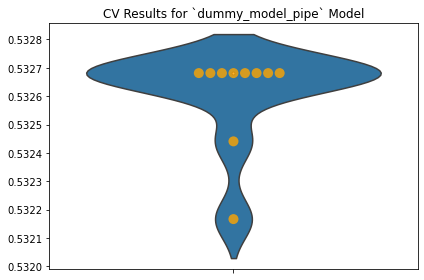

In [36]:
fig, ax = plt.subplots()

ax = dummy_model_pipe.plot_cv(ax)
plt.tight_layout();

dummy_model_pipe.print_cv_summary()

# calling a function from the above class to plot the cv results, as well as print the cv summary. 

The ROCAUC curve is a performance metric used for classification problems at varying thresholds. The AUC, or area under the curve, represents the measure of separability. In other words, it describes how well the model does at distinguishing between the two classes of the target. The higher the AUC, the better the model is at predicting true positives and true negatives. As it applies to this business understanding, the higher the AUC, the better the model is at predicting whether individuals got the vaccine or not. 

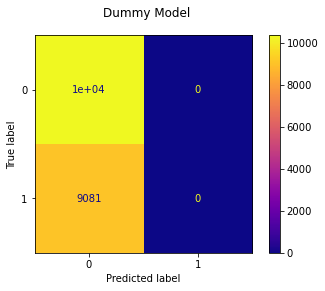

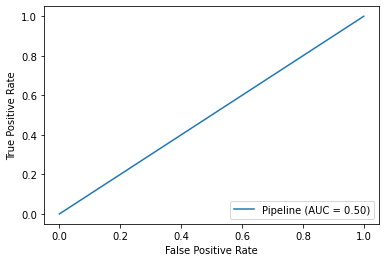

In [38]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_pipe, X_train, y_train, ax=ax, cmap="plasma");

plot_roc_curve(dummy_pipe, X_train, y_train);

# plotting confusino matrix and performance measurement. I will be using accuracy score for iterating through models, 
# although I am still interested in AUC.

Confusion matrix and AUC are as expected for a dummy classifier.

## 1st Model- LogisticRegression

As evident in the bar graphs above, for some features, a response of 1 shows a higher rate of vaccinations, while a response of 0 shows a lower rate of vaccinations. There is somewhat of a linear relationship, but this is binary for the most part. A sigmoid function will help bent the line in a way that can better address this data. For that, we will use Logistic Regression as our first model. 

In [39]:
logreg_model_pipe = Pipeline(steps=[
                    ('ct',ct),
                    ('lr', LogisticRegression(random_state=42))])

logreg_model_pipe.fit(X_train, y_train)

log_pipe = ModelWithCV(model=logreg_model_pipe, 
                       model_name = 'log_pipe', 
                       X=X_train, 
                       y=y_train)

CV Results for `log_pipe` model:
            0.77287 ± 0.00392 accuracy
        
 Train: 0.7738946934994081


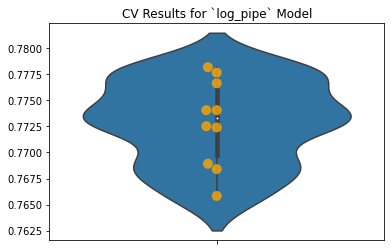

In [40]:
fig, ax = plt.subplots()

log_pipe.plot_cv(ax=ax)

log_pipe.print_cv_summary()

train_score = logreg_model_pipe.score(X_train, y_train)
print(f' Train: {train_score}')

These results are much better than the baseline model, right out the gate. Additionally, we can see that the train score is similar to the cv score, so the model is not overfit. The cv acts like a 'pseudo' test within the train data to isolate the actual testing data, thus preventing data leakage. Since this model is not overfit, but the score is not as high as I'd like, I can add more complexity and more features to get a better score. However, the risk of overfitting still stands if this is done. If I want to try to increase score without adding more complexity, I can reduce regularization. This doesn't increase complexity by adding more features, but rather, it reduces the penalty. If I reduce regularization strength with a smaller C value, and the cv results happen to be worse than train scores, the model is overfit. I might not be able to pull more information out because I don't want to overfit. We will address this later with a GridSearch to maximize our hyperparameters. For now, this is a good starting point. 

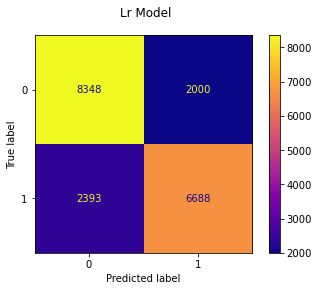

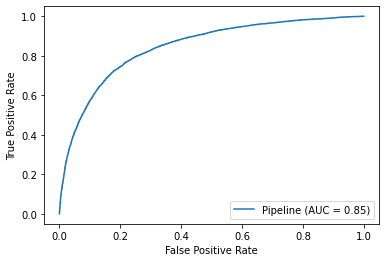

In [41]:
fig, ax = plt.subplots()

fig.suptitle("Lr Model")

plot_confusion_matrix(logreg_model_pipe, X_train, y_train, ax=ax, cmap="plasma");

plot_roc_curve(logreg_model_pipe, X_train, y_train);

AUC significantly better than baseline model.

## 2nd Model- DecisionTreeClassifier

Logistic regression model was good. I'm now going to try a different type of estimator which, unlike logistic regression, can be very overfit right off the bat. Decision trees are inherently overfit. But I want to explore other options for models before deciding on logistic regression.

In [42]:
dt_model_pipe = Pipeline(steps=[
                ('ct', ct), 
                ('dt', DecisionTreeClassifier(random_state=42))])

dt_model_pipe.fit(X_train, y_train)

dt_pipe = ModelWithCV(model=dt_model_pipe,
                         model_name='dt_pipe',
                         X=X_train,
                         y=y_train)

CV Results for `dt_pipe` model:
            0.66586 ± 0.00648 accuracy
        
 Train: 0.9918163569921252


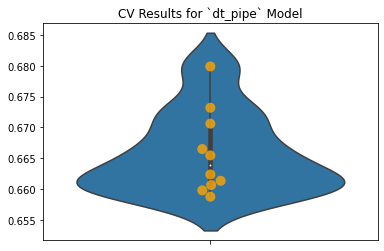

In [43]:
fig, ax = plt.subplots()

dt_pipe.plot_cv(ax=ax);

dt_pipe.print_cv_summary()

train_score = dt_model_pipe.score(X_train, y_train)
print(f' Train: {train_score}')

Train results are significantly overfit, which is expected. The cv results, however, are telling are worse, so I will not be exploring a simple Decision tree estimator any longer. This was a dead end in my opinion.

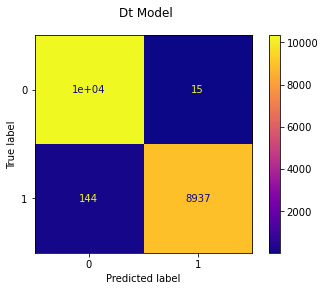

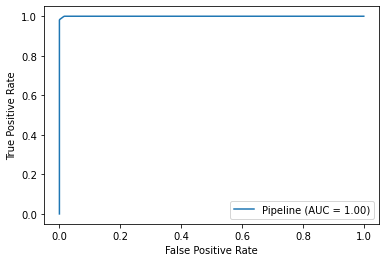

In [45]:
fig, ax = plt.subplots()

fig.suptitle("Dt Model")

plot_confusion_matrix(dt_model_pipe, X_train, y_train, ax=ax, cmap="plasma");

plot_roc_curve(dt_model_pipe, X_train, y_train);

This AUC score shows severe overfitting, which makes sense with decision trees. One way I can adress this is by reducing overfitting. This can be done by reducing complexity or increasing the penalty in regularization. 

## Model 3- RandomForestClassfier

Although decition trees were a dead end, it does not mean I am tossing out the underlying estimator altogether. Instead, I'm going to use an estimator which uses decision trees as its predetermined estimator, while at the same time adding two levels of randomization. Random forest classifier uses bagging (first level of randomization) and feature randomness (second level of randomization) when building each individual tree to try to create an uncorrelated forest of trees whose prediction by all of the trees is more accurate than that of any individual tree. 

In [46]:
rfc_model_pipe = Pipeline(steps=[
                ('ct', ct), 
                ('rfc', RandomForestClassifier(random_state=42))])

rfc_model_pipe.fit(X_train, y_train)

forest_pipe = ModelWithCV(model=rfc_model_pipe, 
                          model_name='forest_pipe', 
                          X=X_train, 
                          y=y_train)

CV Results for `forest_pipe` model:
            0.75979 ± 0.00765 accuracy
        
 Train: 0.9918163569921252


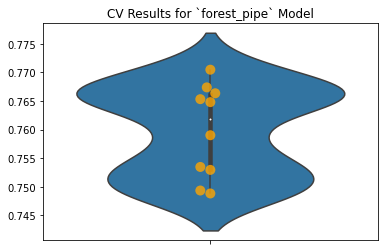

In [47]:
fig, ax = plt.subplots()

forest_pipe.plot_cv(ax=ax)

forest_pipe.print_cv_summary()

train_score = rfc_model_pipe.score(X_train, y_train)
print(f' Train: {train_score}')

Score is higher than decision trees. I'm on the right track. Adding more levels of randomization resulted in a higher accuracy score. 

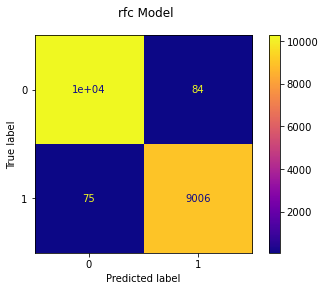

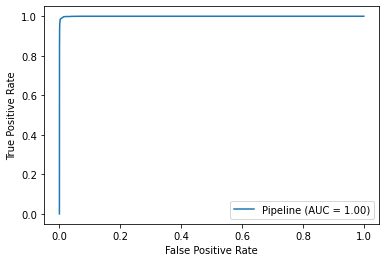

In [48]:
fig, ax = plt.subplots()

fig.suptitle("rfc Model")

plot_confusion_matrix(rfc_model_pipe, X_train, y_train, ax=ax, cmap="plasma");

plot_roc_curve(rfc_model_pipe, X_train, y_train);

Random forest is already better than a simple decision tree model, however it is even more overfit. This is fine, and can be adressed later on. What I'm happy about right now is that the score is higher when using a more complex model. 

## Model 4- ExtraTreesClassifier

If adding 2 levels of randomization proved to be fruitful, I wonder what would happen if I add yet another level of randomization with the extra trees classifier. Random Forest chooses the optimum split while Extra Trees chooses it randomly. However, extra trees is still optimizeable. Let's see what these results bring.

In [49]:
etc_model_pipe = Pipeline(steps=[
                    ('ct', ct), 
                    ('etc', ExtraTreesClassifier(bootstrap=True, random_state=42))])

etc_model_pipe.fit(X_train, y_train)

extra_pipe = ModelWithCV(model=etc_model_pipe,
                         model_name='extra_pipe',
                         X=X_train,
                         y=y_train)

CV Results for `extra_pipe` model:
            0.75686 ± 0.00726 accuracy
        
 Train: 0.9918163569921252


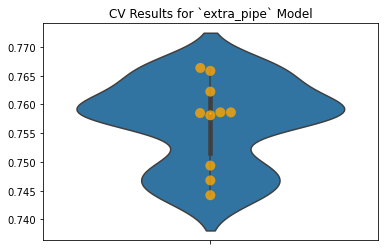

In [50]:
fig, ax = plt.subplots()

extra_pipe.plot_cv(ax=ax);

extra_pipe.print_cv_summary()

train_score = etc_model_pipe.score(X_train, y_train)
print(f' Train: {train_score}')

The accuracy score is slightly lower, while the amount of overfitting is very slightly higher.

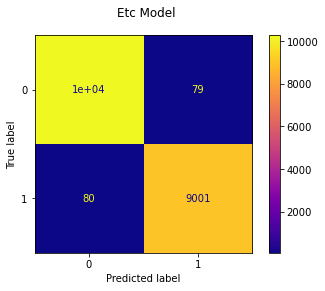

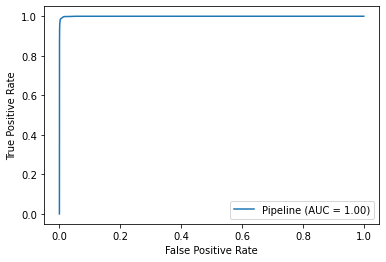

In [51]:
fig, ax = plt.subplots()

fig.suptitle("Etc Model")

plot_confusion_matrix(etc_model_pipe, X_train, y_train, ax=ax, cmap="plasma");

plot_roc_curve(etc_model_pipe, X_train, y_train);

Just like the model before it, and as expected, this is very overfit. Additionally, this iteration seems like a dead end. Adding yet another level of randomization did not do much.

## Model 5- KNeighborsClassifier

Since I reached the maximum accuracy score using estimators that use decition trees, I will not try to pivot directions, while at the same time keeping the random forest classifier in mind as the best performing model so far. This is an iterative approach, so I would like to try to approach this from yet another angle. Logistic regression was also decent, so I'm going to expand on that, just like how I expanded on the first decision trees model. Kneighbors classifier is another distance based algorithm similar to logistic regression. The difference, however, is that Lr looks at distance between true values and predictions, whereas KNN uses the distance in the final .predict step under the hood. They use distance metrics a bit differently, but they are still both distance metrics at the end of the day. Let's see how another distance based estimator does.

In [52]:
knn_model_pipe = Pipeline(steps=[
                ('ct', ct), 
                ('knn', KNeighborsClassifier())])

knn_model_pipe.fit(X_train, y_train)

knn_pipe = ModelWithCV(model=knn_model_pipe,
                         model_name='knn_pipe',
                         X=X_train,
                         y=y_train)

CV Results for `knn_pipe` model:
            0.72577 ± 0.01025 accuracy
        
 Train: 0.808688043646096


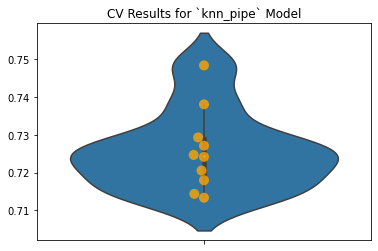

In [53]:
fig, ax = plt.subplots()

knn_pipe.plot_cv(ax=ax);

knn_pipe.print_cv_summary()

train_score = knn_model_pipe.score(X_train, y_train)
print(f' Train: {train_score}')

CV Results for `log_pipe` model:
            0.77287 ± 0.00392 accuracy
        
 Train: 0.7738946934994081
 
 
CV Results for `forest_pipe` model:
            0.75979 ± 0.00765 accuracy
        
 Train: 0.9918163569921252
 
We can see that KNN performed better than decision trees, but not as well as logistic regression or random forest. 
It's worth noting that Knn is significantly less overfit than random forest, yet more overfit than logistic regression.

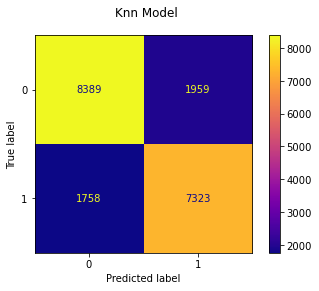

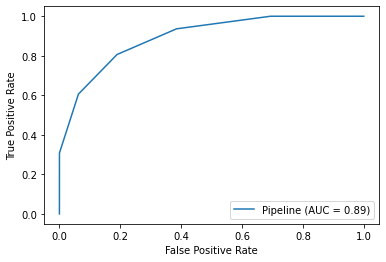

In [54]:
fig, ax = plt.subplots()

fig.suptitle("Knn Model")

plot_confusion_matrix(knn_model_pipe, X_train, y_train, ax=ax, cmap="plasma");

plot_roc_curve(knn_model_pipe, X_train, y_train);

I am no longer interested in further iteratoins on Knn. While it was less overfit than forest, logistic regression had a higher accuracy score and wasn't overfit. Logistic regression performed better than Knn, so that is the distance metric I'm going to put aside and focus on later on. 

## Model 6- BaggingClassifier

I will now try another ensemble learning method. Bagging classifier also uses a decision tree, but adds 1 level of randomization as compared to random forest. I wonder what only 1 level of randomization will do. In bagging, a random sample of data in a training set is selected with replacement. This means that the individual data points can be chosen more than once.

In [55]:
bag_model_pipe = Pipeline(steps=[
                ('ct', ct), 
                ('bag', BaggingClassifier(n_estimators=100, random_state=42))])

bag_model_pipe.fit(X_train, y_train)

bag_pipe = ModelWithCV(model=bag_model_pipe,
                         model_name='bag_pipe',
                         X=X_train,
                         y=y_train)

CV Results for `bag_pipe` model:
            0.74723 ± 0.00695 accuracy
        
 Train: 0.9918163569921252


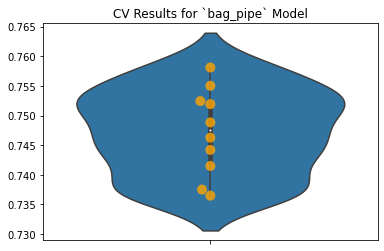

In [56]:
fig, ax = plt.subplots()

bag_pipe.plot_cv(ax=ax);

bag_pipe.print_cv_summary()

train_score = bag_model_pipe.score(X_train, y_train)
print(f' Train: {train_score}')

CV Results for `log_pipe` model:
            0.77287 ± 0.00392 accuracy
        
 Train: 0.7738946934994081
 
 
CV Results for `forest_pipe` model:
            0.75979 ± 0.00765 accuracy
        
 Train: 0.9918163569921252
 
This model is just as overfit as random forest, more overfit than logistic regression, and performs worse than the two. 

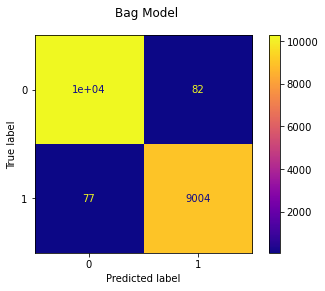

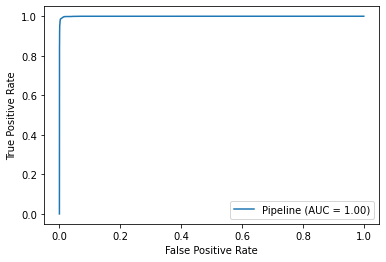

In [58]:
fig, ax = plt.subplots()

fig.suptitle("Bag Model")

plot_confusion_matrix(bag_model_pipe, X_train, y_train, ax=ax, cmap="plasma");

plot_roc_curve(bag_model_pipe, X_train, y_train);

Not much was gained from this iteration. We did not increase accuracy score or reduce overfitting. Another dead end. Let's try another ensemble learning method.

## Model 7- GradientBoostingClassifier

Gradient boosting classifier combines many weaker learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. I would like to see if boosting will result in better scores than random forest, since both use decision trees. Gradient boosting classifier minimizes a loss function by iteratively choosing a function that points towards the negative gradient.

In [59]:
gbc_model_pipe = Pipeline(steps=[
                ('ct', ct), 
                ('gbc', GradientBoostingClassifier(random_state=42))])

gbc_model_pipe.fit(X_train, y_train)

boost_pipe = ModelWithCV(model=gbc_model_pipe,
                         model_name='boost_pipe',
                         X=X_train,
                         y=y_train)

CV Results for `boost_pipe` model:
            0.78007 ± 0.00596 accuracy
        
 Train: 0.7879973235884502


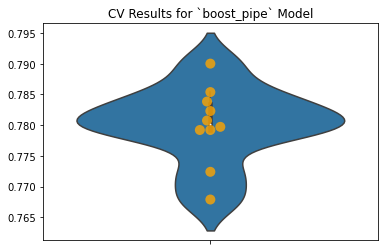

In [60]:
fig, ax = plt.subplots()

boost_pipe.plot_cv(ax=ax)

boost_pipe.print_cv_summary()

train_score = gbc_model_pipe.score(X_train, y_train)
print(f' Train: {train_score}')

CV Results for `log_pipe` model:
            0.77287 ± 0.00392 accuracy
        
 Train: 0.7738946934994081
 
 
CV Results for `forest_pipe` model:
            0.75979 ± 0.00765 accuracy
        
 Train: 0.9918163569921252
 
This is the best performing model yet. Accuracy score increased and overfitting decreased. This performed better than logistic regression and random forest. 

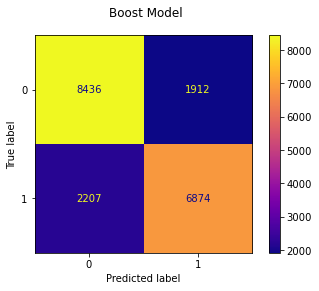

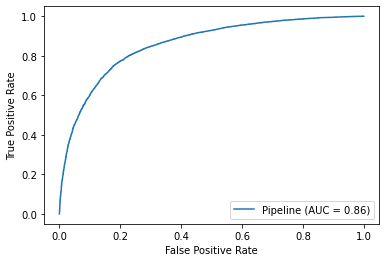

In [61]:
fig, ax = plt.subplots()

fig.suptitle("Boost Model")

plot_confusion_matrix(gbc_model_pipe, X_train, y_train, ax=ax, cmap="plasma");

plot_roc_curve(gbc_model_pipe, X_train, y_train);

Since this is my best performing model so far, I will put it aside and run a gridsearch on it later. Definitely worth exploring this futher. Although it's my best model, I'm not going to forget about lr or random forest, as doing a hyperparameter search for them could prove to be helpful. I haven't fine tuned anything yet, so I'm still considering lr and rfc.

## Model 8- VotingClassifier

Although I have a decent model, I would like to make sure I address the issue from as many angles as possible to create a more robust approach. The voting classifier trains various estimators and predicts on the basis of aggregating the findings of each estimator. The aggregating criteria can be combined decision of voting for each estimator output. 

In [62]:
avg_model_pipe = Pipeline(steps=[
    ('ct', ct), 
    ('avg', VotingClassifier(estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rfc', RandomForestClassifier(random_state=42)),
        ('gbc', GradientBoostingClassifier(random_state=42))], voting='soft'))])

avg_model_pipe.fit(X_train, y_train)

average_pipe = ModelWithCV(model=avg_model_pipe,
                         model_name='average_pipe',
                         X=X_train,
                         y=y_train)

CV Results for `average_pipe` model:
            0.77950 ± 0.00452 accuracy
        
 Train: 0.8683411395336867


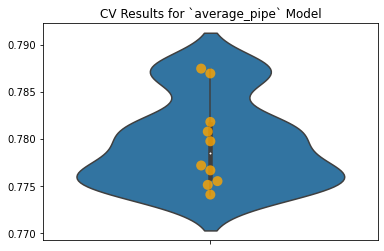

In [63]:
fig, ax = plt.subplots()

average_pipe.plot_cv(ax=ax);

average_pipe.print_cv_summary()

train_score = avg_model_pipe.score(X_train, y_train)
print(f' Train: {train_score}')

CV Results for log_pipe model: 0.77287 ± 0.00392 accuracy

Train: 0.7738946934994081

CV Results for forest_pipe model: 0.75979 ± 0.00765 accuracy

Train: 0.9918163569921252

CV Results for `boost_pipe` model:
            0.78007 ± 0.00596 accuracy
        
Train: 0.7879973235884502

Voting classifier scores better than lr and random forest, but not boost. It's not as overfit as random forests, but still more overfit than boost and logistic regression.

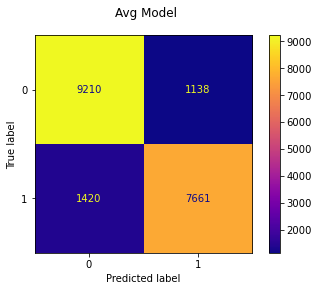

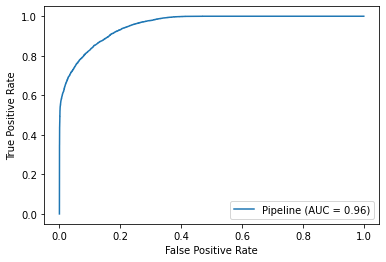

In [64]:
fig, ax = plt.subplots()

fig.suptitle("Avg Model")

plot_confusion_matrix(avg_model_pipe, X_train, y_train, ax=ax, cmap="plasma");

plot_roc_curve(avg_model_pipe, X_train, y_train);

This ensemble learning method proved to be successful. It's just barely slightly better than logistic regression. But still not performing better than boost. Still overfit. Let me try another ensemble method, since I like where this is going.

## Model 9- StackingClassifier

Stacking classifier is another ensemble learning method where the predictions of multiple classifiers are used as new features to train a meta-classifier. This estimator stacks the output of individual estimators and use a classifier to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator.I like the meta iterative approach this estimator has to offer. Let's see how it performs with my top 3 performing estimators. I'm not going to use voting classifier within the stacking classifier because I don't want too much complexity. This will most likely result in a very overfit model. Instead, I'm going to use my top 3 non ensemble estimators. 

In [65]:
# I put boost, logistic regression, and random forest in my stacking classifier because they were my best "simpler"
# models so far. Their order is based on accuracy score, going from best to worst. 

estimators = [
    ('gbc', GradientBoostingClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42)), 
    ('rfc', RandomForestClassifier(random_state=42))]

stacked_model_pipe = Pipeline(steps=[
                    ('ct', ct), 
                    ('sr', StackingClassifier(estimators, stack_method='predict_proba'))])

stacked_model_pipe.fit(X_train, y_train)

stacked_pipe = ModelWithCV(model=stacked_model_pipe,
                         model_name='stacked_pipe',
                         X=X_train,
                         y=y_train)

CV Results for `stacked_pipe` model:
            0.78131 ± 0.00569 accuracy
        
 Train: 0.8014823202429359


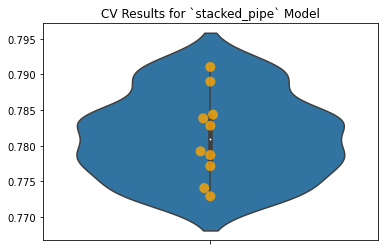

In [66]:
fig, ax = plt.subplots()

stacked_pipe.plot_cv(ax=ax);

stacked_pipe.print_cv_summary()

train_score = stacked_model_pipe.score(X_train, y_train)
print(f' Train: {train_score}')

CV Results for log_pipe model: 0.77287 ± 0.00392 accuracy

Train: 0.7738946934994081

CV Results for forest_pipe model: 0.75979 ± 0.00765 accuracy

Train: 0.9918163569921252

CV Results for boost_pipe model: 0.78007 ± 0.00596 accuracy

Train: 0.7879973235884502

CV Results for `average_pipe` model:
            0.77950 ± 0.00452 accuracy
        
 Train: 0.8683411395336867
 
This estimator is scores very slightly better than boost. So far this is the best estimator, although it's more overfit than boost, which is the second best estimator.  

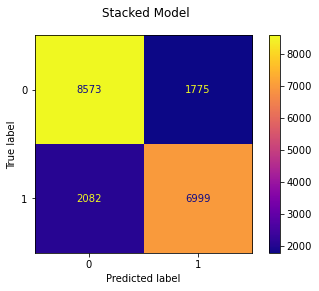

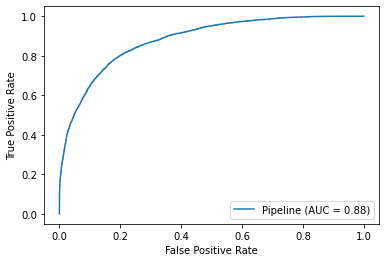

In [67]:
fig, ax = plt.subplots()

fig.suptitle("Stacked Model")

plot_confusion_matrix(stacked_model_pipe, X_train, y_train, ax=ax, cmap="plasma");

plot_roc_curve(stacked_model_pipe, X_train, y_train);

Voting classifier is more overfit than stacking classifier, and performs worse, so I'm going to pick stacking as my go to ensemble learning mthod over voting in my next iteration. 
Having decided on stacking as my ensemble learning method, and including my top 3 non ensemble models in it, it's time to fine tune hyperparameters. 

# Hyperparameter Tuning

### Grid Search on gbc

Since a grid search is very computationaly expensive, I'm going to run a grid search on each individual model within the stack, and then apply those fine tuned hyperparameters, and then run a grid search on the following estimator with those prevoiusly calculated hyperparameters in place for the previous model. This is an iterative approach of grid searching within the stacking. The reason I'm able to do this is because it lines up nicely with the way the stacking classifier works, in the sense that it's using output from previous model to influence output of the following model. As I iterate through the grid searches, I am going to use those hyperparameters when grid searching the next estimator in the list within my stack. In this way, I am fine tuning as I grid search on the next model, to then fine tune it, and so on. 

In [79]:
# running grid search on gbc first because that's the order it's in my stacking classifier. It is the best performing
# model, so I want the best estimator to be first and influence the outputs of the following estimators. I want to start
# off strong. 
params_gbc = {
    'sr__gbc__n_estimators' : [175, 200, 225],
    'sr__gbc__max_depth' : [3, 6, 9]}

gs_gbc = GridSearchCV(stacked_model_pipe, params_gbc, n_jobs=-1, cv=3, verbose=3)

gs_gbc.fit(X_train, y_train)

# I would like to find the prime parameters for the number of estimators, as well as the max depth. 
# I beleve these two parameters significantly influence the performance of the model, 
# and would like to find the best values to maximize my accuracy score. 

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:   57.6s remaining:   28.8s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.9min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('get_num',
                                                                                          FunctionTransformer(func=<function grab_numeric at 0x7fb8c1238dc0>)),
                                                                                         ('num_impute',
                                                                                          SimpleImputer()),
                                                                                         ('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavi

In [80]:
gs_gbc.best_params_

{'sr__gbc__max_depth': 3, 'sr__gbc__n_estimators': 200}

Looks like the default parameter for max depth works best, but number of estimators should be adjusted to 200. 
My first grid search for n estimators used 100 250, 500 and returned 250. My second grid search used 200, 250, and 300 and returned 200. My third grid search used 175, 200, and 225, and returned 200.

In [81]:
gs_gbc.best_score_

0.7793505258578136

Time to apply these tune parameters to my stacking classifier. The best parameters for boost will be used in the next grid search on the following estimator, lr. 

In [82]:
new_stack_gbc_pipe = gs_gbc.best_estimator_

### Grid Search on lr

I would like to grid search the level of regularization, as discussed previously for logistic regression. 
Maybe fine tuning the regularization will result in a higher score without overfitting the model. Let's take a look. 

In [85]:
# having found the best hyperparameters for boost, I'm going to hold them in place for the first estimator of the stack, 
# while grid searching the best hyperparemeters for the next model.

params_lr = {
    'sr__lr__C':[3,4, 5],
    'sr__lr__solver' : ['lbfgs','sag']}


gs_lr = GridSearchCV(new_stack_gbc_pipe, params_lr, n_jobs=-1, cv=3, verbose=3)

gs_lr.fit(X_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  18 | elapsed:   20.2s remaining:   40.3s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   37.5s remaining:   14.4s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   40.5s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('get_num',
                                                                                          FunctionTransformer(func=<function grab_numeric at 0x7fb8c1238dc0>)),
                                                                                         ('num_impute',
                                                                                          SimpleImputer()),
                                                                                         ('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavi

In [86]:
gs_lr.best_params_

{'sr__lr__C': 4, 'sr__lr__solver': 'lbfgs'}

Looks like we found a better C value, 4, than the default, but the best solver remains the default solver. This is a nice step in fine tuning parameters. 
My first grid search on C used 1, 10, 20 and returned 10. My second grid search used 5, 10, 15 and returned 5. My third grid search used 3, 5, 7 and returned 3. My fourth grid search used 2, 3, 4 and returned 4. My last grid search used 3, 4, 5 and returned 4. 

In [87]:
gs_lr.best_score_

0.7794019979599341

Now, I will apply both the prime boost hyperparameters as well as the prime lr hyperparameters to the first two estimators in my stack, as I grid search the final estimator. 

In [88]:
new_stack_lr_pipe = gs_lr.best_estimator_

### Grid Search on rfc

Just like with boost, I believe the number of estimators plays a significant role on the score of the model. I'm going to grid search the estimators, as well as the criterion random forest uses when making splitting decisions, as that is at the core of the estimator. 

In [89]:
params_rfc = {
    'sr__rfc__n_estimators' : [100, 250],
    'sr__rfc__criterion' : ['gini', 'entropy']}


gs_rfc = GridSearchCV(new_stack_lr_pipe, params_rfc, n_jobs=-1, cv=3, verbose=3)

gs_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:   20.0s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:   27.3s remaining:   13.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   44.5s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('get_num',
                                                                                          FunctionTransformer(func=<function grab_numeric at 0x7fb8c1238dc0>)),
                                                                                         ('num_impute',
                                                                                          SimpleImputer()),
                                                                                         ('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavi

In [90]:
gs_rfc.best_params_

{'sr__rfc__criterion': 'entropy', 'sr__rfc__n_estimators': 100}

Looks like the default parameters for n estimators work best, but the entropy criterion works better than the default gini. Finally we have fine tuned all the estimators within our stacking classifier to get the best working model.

In [93]:
gs_rfc.best_score_

0.7795049342172707

We now have tune hyperparameters for the first two models, and know that the third model in the stack performs best with default tuning. Let's apply these parameters to our final model. 

In [94]:
final_model_pipe = gs_rfc.best_estimator_

# Evaluation

## Final Model

I have chosen to use stacking as my ensemble learning method, with my top 3 basic models within it. This performed better than voting classifier. 
After running a grid search on each estimator within my stack, I have iterated to find the best performing model with the best parameters. Time to see how my model works with unseen data. 

In [95]:
final_model_pipe.fit(X_train, y_train)

final_pipe = ModelWithCV(model=final_model_pipe,
                         model_name='final_pipe',
                         X=X_train,
                         y=y_train)

CV Results for `final_pipe` model:
            0.78043 ± 0.00578 accuracy
        
 Train: 0.7959236193319265
 Test: 0.7841593330245484


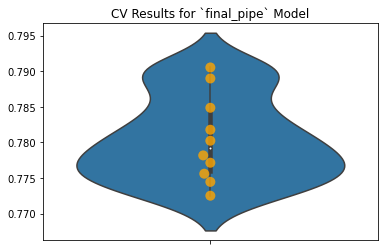

In [96]:
fig, ax = plt.subplots()

final_pipe.plot_cv(ax=ax);

final_pipe.print_cv_summary()

train_score = final_model_pipe.score(X_train, y_train)
test_score = final_model_pipe.score(X_test, y_test)
#score default is accuracy for a classifier

print(f' Train: {train_score}')
print(f' Test: {test_score}')

We can see that the model is not significantly overfit when comapring train score to cv score for our 'pseudo' test. This is a good sign.

More importantly, the model performs similarly on train and test data, so it is not overfit. 

This final model predicts vaccination status with 78.4% accuracy. 

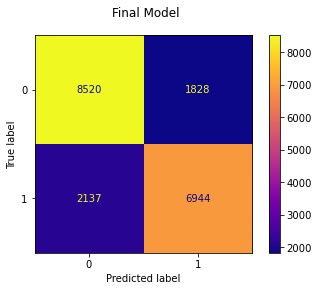

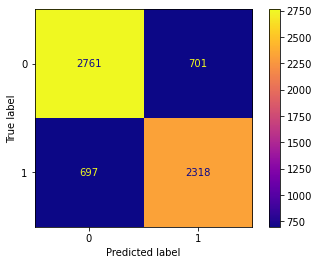

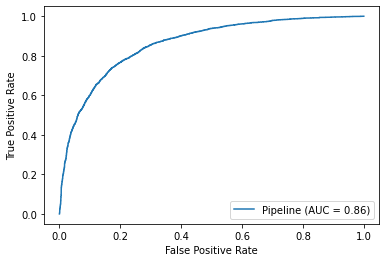

In [97]:
fig, ax = plt.subplots()

fig.suptitle("Final Model")

plot_confusion_matrix(final_model_pipe, X_train, y_train, ax=ax, cmap="plasma");

plot_confusion_matrix(final_model_pipe, X_test, y_test, cmap="plasma");

plot_roc_curve(final_model_pipe, X_test, y_test);

86% of the people that are predicted to be vaccinated were in fact vaccinated. This is the true positive. 
86% success rate for positive predictions. 

Let's run predictions to see how the model works with unseen data and score its performance based on other calculations. Here I am scoring with the predictions from above, as well as the target from test data. Although I am most interested in accuracy, these will give a slightly more robust perspective on how well the model is performing. 

In [99]:
y_hat = final_model_pipe.predict(X_test)

print(f"""
Final model's accuracy on the test set is {round(accuracy_score(y_test, y_hat), 2)} \n
Final model's recall on the test set is {round(recall_score(y_test, y_hat), 2)} \n
Final model's precision on the test set is {round(precision_score(y_test, y_hat), 2)} \n
Final model's f1-score on the test is {round(f1_score(y_test, y_hat), 2)} \n
Final model's AUC score on the test is {round(roc_auc_score(y_test, y_hat), 2)}
""")


Final model's accuracy on the test set is 0.78 

Final model's recall on the test set is 0.77 

Final model's precision on the test set is 0.77 

Final model's f1-score on the test is 0.77 

Final model's AUC score on the test is 0.78



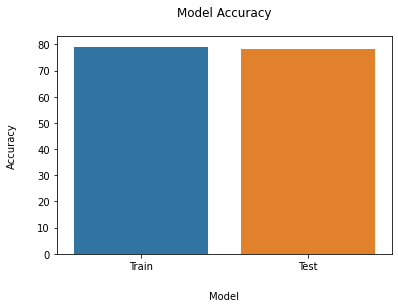

In [101]:
accuracy_scores = [79.12913685727521, 78.35417631619577]

fig, ax = plt.subplots()
    
sns.barplot(x=[1,2], y=accuracy_scores)
ax.set_ylabel('Accuracy', labelpad=20)
ax.set_xticklabels(['Train', 'Test'])
ax.set_xlabel('Model', labelpad=20)
ax.grid(False)
ax.set_title('Model Accuracy', pad=20)
plt.savefig('Images/model_bar.png', bbox_inches='tight')

plt.show()

# plotting a visual to compare train and test accuracy.

## Feature Importances and Coefficients

Now that I have iterated and found my best model, I am interested in seeing which specific features affect the model performance (accuracy) when predicting the class. 

In [115]:
gbc_features = final_model_pipe.named_steps['sr'].named_estimators_['gbc'].feature_importances_
lr_features = final_model_pipe.named_steps['sr'].named_estimators_['lr'].coef_
rfc_features = final_model_pipe.named_steps['sr'].named_estimators_['rfc'].feature_importances_

# stepping through the pipelines to access feature importances of gbc and rfc, and coefficients of lr.

num_features = grab_numeric(X_train).columns
num_list = list(num_features)

ohe_features = final_model_pipe.named_steps['ct'].named_transformers_['subpipe_cat']['ohe'].get_feature_names()
ohe_list = list(ohe_features)

# creating a combined list of all these features from both numerical and categorical columns. 

features_list = num_list + ohe_list

In [122]:
# converting to dataframe where the index is the list of features from numerical and categorical,
# and the columns are the feature importances and coefficients for gbc, rfc, and lr respectively. 

features_df = pd.DataFrame(lr_features[0], features_list, columns= ['lr_features'])
features_df['gbc_features'] = gbc_features
features_df['rfc_features'] = rfc_features
features_df.sort_values(by='lr_features', ascending=False).head(4)

# sorting the dataframe by descending order of best lr coefficients first.

,lr_features,gbc_features,rfc_features
x0_65+ Years,0.881124,0.085526,0.025307
opinion_seas_risk,0.740250,0.233391,0.112993
opinion_seas_vacc_effective,0.615576,0.301605,0.101683
doctor_recc_seasonal,0.566481,0.202669,0.084397


In [123]:
features_df.sort_values(by='gbc_features', ascending=False).head(4)

# sorting dataframe by descending order of best gbc features.

,lr_features,gbc_features,rfc_features
opinion_seas_vacc_effective,0.615576,0.301605,0.101683
opinion_seas_risk,0.740250,0.233391,0.112993
doctor_recc_seasonal,0.566481,0.202669,0.084397
x0_65+ Years,0.881124,0.085526,0.025307


In [124]:
features_df.sort_values(by='rfc_features', ascending=False).head(4)

# sorting dataframe by descending order of best rfc features.

,lr_features,gbc_features,rfc_features
opinion_seas_risk,0.740250,0.233391,0.112993
opinion_seas_vacc_effective,0.615576,0.301605,0.101683
doctor_recc_seasonal,0.566481,0.202669,0.084397
opinion_seas_sick_from_vacc,-0.304472,0.035408,0.063536


As evident above, there are 3 features/coefficients that are ranked highest for all 3 columns. They are opinion_seas_risk, opinion_seas_vacc_effective, and doctor_recc_seasonal. Additionally, x0_65+ Years appears in two of the three sorted dataframes, so I will include this as well. 

The top features/coefficients are x0_65+ Years, opinion_seas_risk, opinion_seas_vacc_effective, and doctor_recc_seasonal.

## Recommendations

Based on the top features and coefficients, we now know which factors most strongly affect the vaccination rate of any given individual. Therefore, honing in on these features and addressing them directly will result in the most change to vaccination rates. The following actionable recommendations will result in a significant sway of public opinion and a reduction of vaccination rates.

- Targetting individuals 65 years and older to try and reduce their vaccination rates.
- Changing opinions of the masses about the risk of getting infected without a vaccine.
- Changing opinions of the masses about the effectivenesss of the vaccine.
- Targetting doctors to offer incentives for withholding vaccination recommendation.

# Conclusion

In [ ]:
# sum up model evaluation and recs
# bullet point the recs 
# reiterate back to business problem. 